In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [19, 8] 

In [3]:
import warnings
warnings.filterwarnings('ignore')

# K Nearest Neighbour

K Nearest Neighbour (KNN) is a classification algorithm that classifies a new data point based on its nearest neighbours.

In KNN, a group of neighbours are selected (K value), and the new data point is classified under the class to which majority of neighbours belong.

K represents the number of nearest neighbours chosen by the model. Choosing the appropriate value of K, results in better prediction.

KNN is populary used in:

* Recommender system
* Concept search

## Chosing the K value

K value is chosen as square root of the total number of test data points.

If the target variable has 2 categories, K value is chosen as odd number since the classifier will have a confusion if 2 classes are equally representing the new data element.

## Distance Calculation

KNN model decides the nearest neighbours depending on the distance from the neighbouring points to the new data point.

The distance is calculated using:

* Euclidean distance
* Manhattan distance
* Minkowski distance

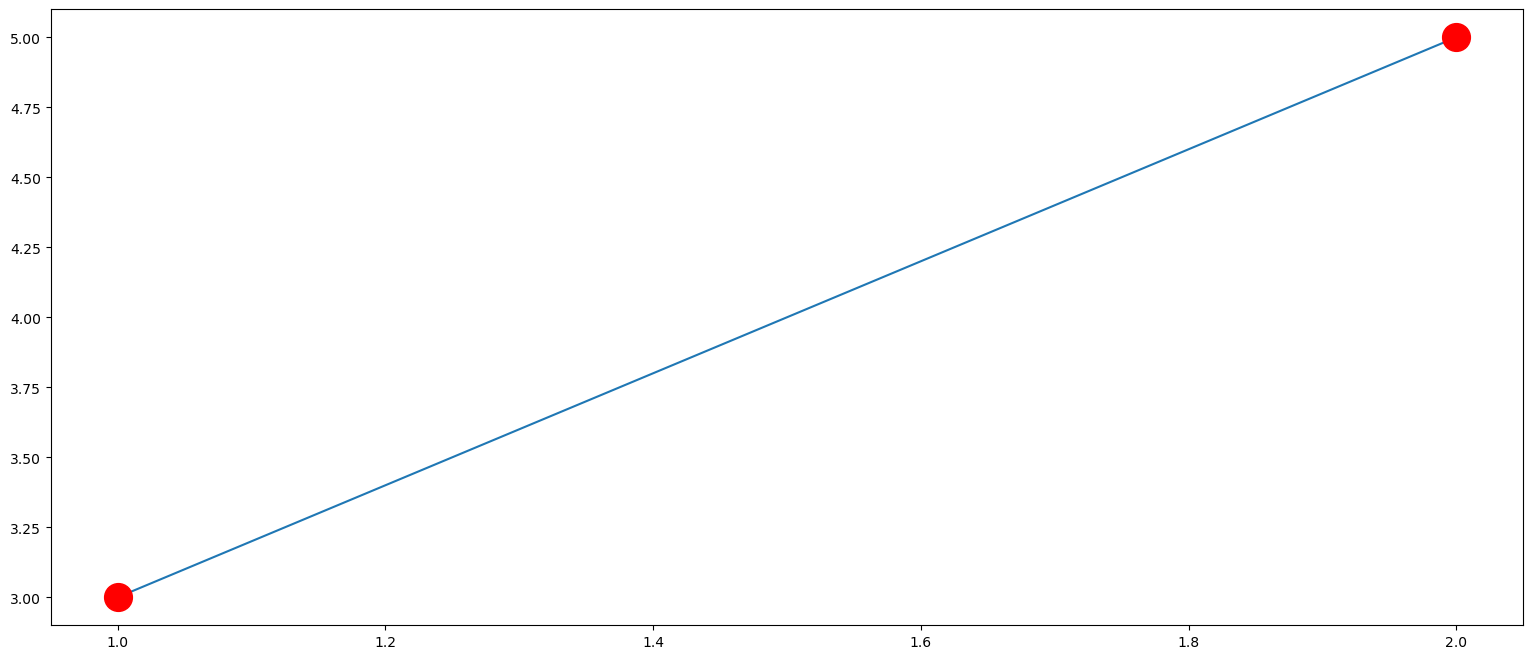

In [4]:
x = np.array([1, 2])
y = np.array([3, 5])

plt.plot(x, y, marker = 'o', ms=20, mec='r', mfc='r')
plt.show()

Euclidean Distance d = $ \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $ 

Manhattan Distance d = $ |x_2 - x_1| + |y_2 - y_1| $

Minkowski Distance d = $ (|x_2 - x_1|^p + |y_2 - y_1|^p) ^1/p $ 

**Note:**

If p = 1, Minkowski Distance becomes Manhattan Distance.

If p = 2, Minkowski Distance becomes Euclidean Distance

## Mathematics

In [5]:
data = {
    'Height': [158, 158, 158, 160, 160, 163, 163, 160, 163, 165, 165, 165, 168, 168, 168, 170, 170, 170],
    'Weight': [58, 59, 63, 59, 60, 60, 61, 64, 64, 61, 62, 65, 62, 63, 66, 63, 64, 68],
    'ShirtSize': ['M', 'M', 'M','M','M','M','M','L','L','L','L','L','L','L','L','L','L','L',]
}

df = pd.DataFrame(data)

df.head()

,Height,Weight,ShirtSize
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [6]:
new_height = 161
new_weight = 61

In [7]:
df['Distance'] = np.sqrt((df['Height'] - new_height)**2 + (df['Weight'] - new_weight)**2)

In [8]:
df.head()

,Height,Weight,ShirtSize,Distance
0,158,58,M,4.242641
1,158,59,M,3.605551
2,158,63,M,3.605551
3,160,59,M,2.236068
4,160,60,M,1.414214


In [9]:
k_value = 5

In [10]:
df.sort_values(by='Distance', ascending=True).head(k_value)

,Height,Weight,ShirtSize,Distance
4,160,60,M,1.414214
6,163,61,M,2.000000
3,160,59,M,2.236068
5,163,60,M,2.236068
7,160,64,L,3.162278


## Case Study - Pima Indian Diabetes Dataset

In [11]:
diabetes_df = pd.read_csv('../datasets/diabetes.csv')

In [12]:
diabetes_df.shape

(768, 9)

In [13]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome 1 indicates that the patient has diabetes and 0 indicates that the patient does not have diabetes.

In [14]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing Values

#### Columns containing zeros.

In [15]:
for column in diabetes_df.columns:
    print(f'{column}: {diabetes_df.loc[diabetes_df[column] == 0, column].count()}')

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


#### Replace zero value by NaN

In [16]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    diabetes_df[column] = diabetes_df[column].replace(0, np.nan)

In [17]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### Replace NaN by median

In [18]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    diabetes_df[column].fillna(diabetes_df[column].median(), inplace=True)

In [19]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Data Visualization

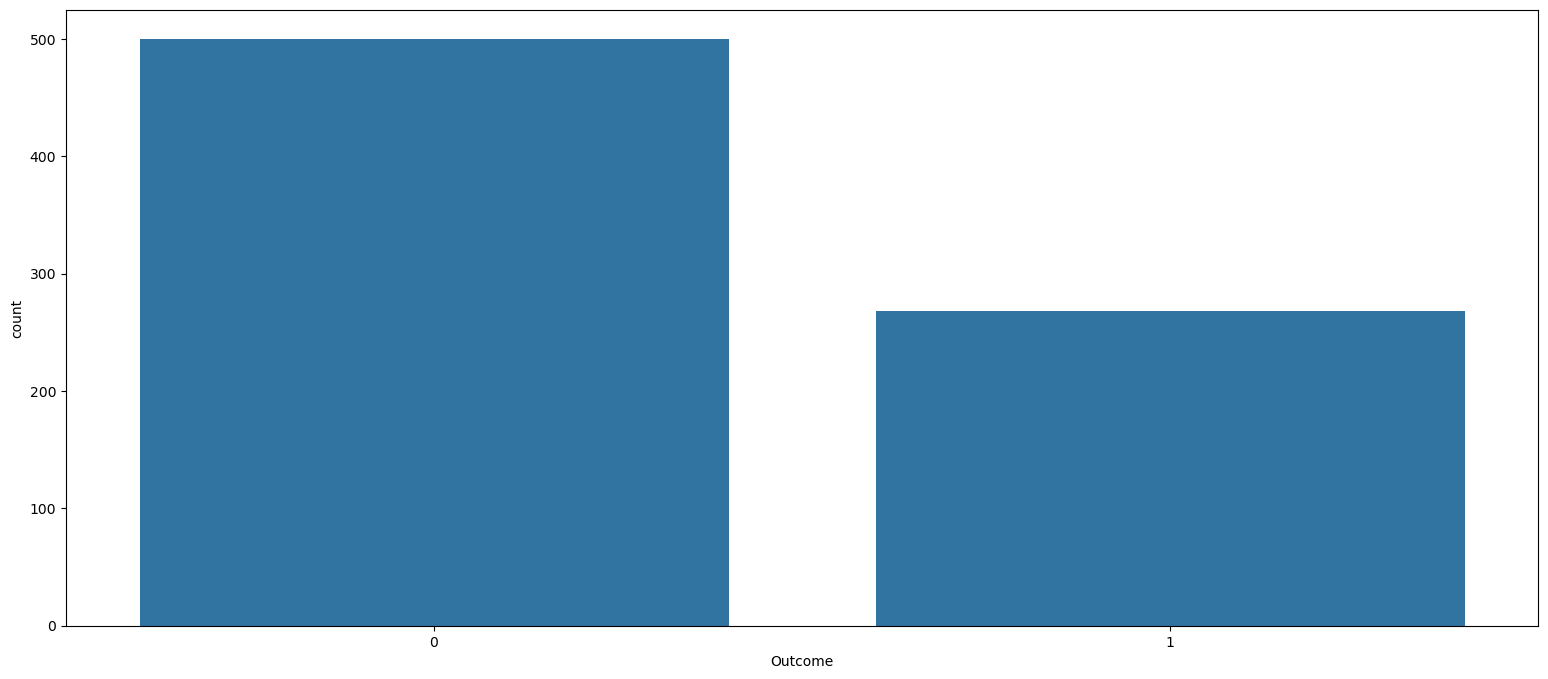

In [20]:
sns.countplot(data=diabetes_df, x='Outcome')

plt.show()

### Outlier

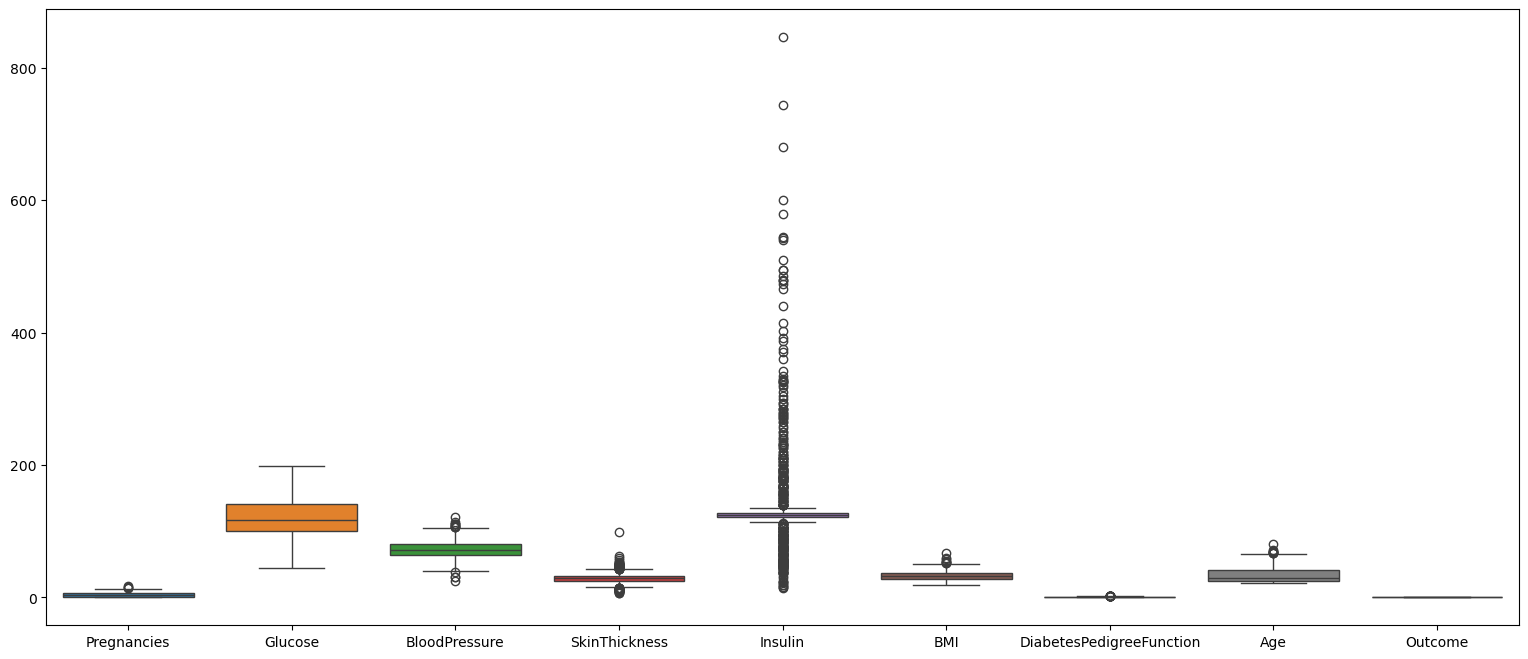

In [21]:
sns.boxplot(diabetes_df)

plt.show()

In [22]:
# obtain the first quartile
Q1 = diabetes_df.quantile(0.25)

# obtain the third quartile
Q3 = diabetes_df.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
Insulin                      5.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [23]:
ul = Q3 + 1.5 * IQR

ll = Q1 - 1.5 * IQR

In [24]:
diabetes_df = diabetes_df[~((diabetes_df < ll) |(diabetes_df > ul)).any(axis=1)]

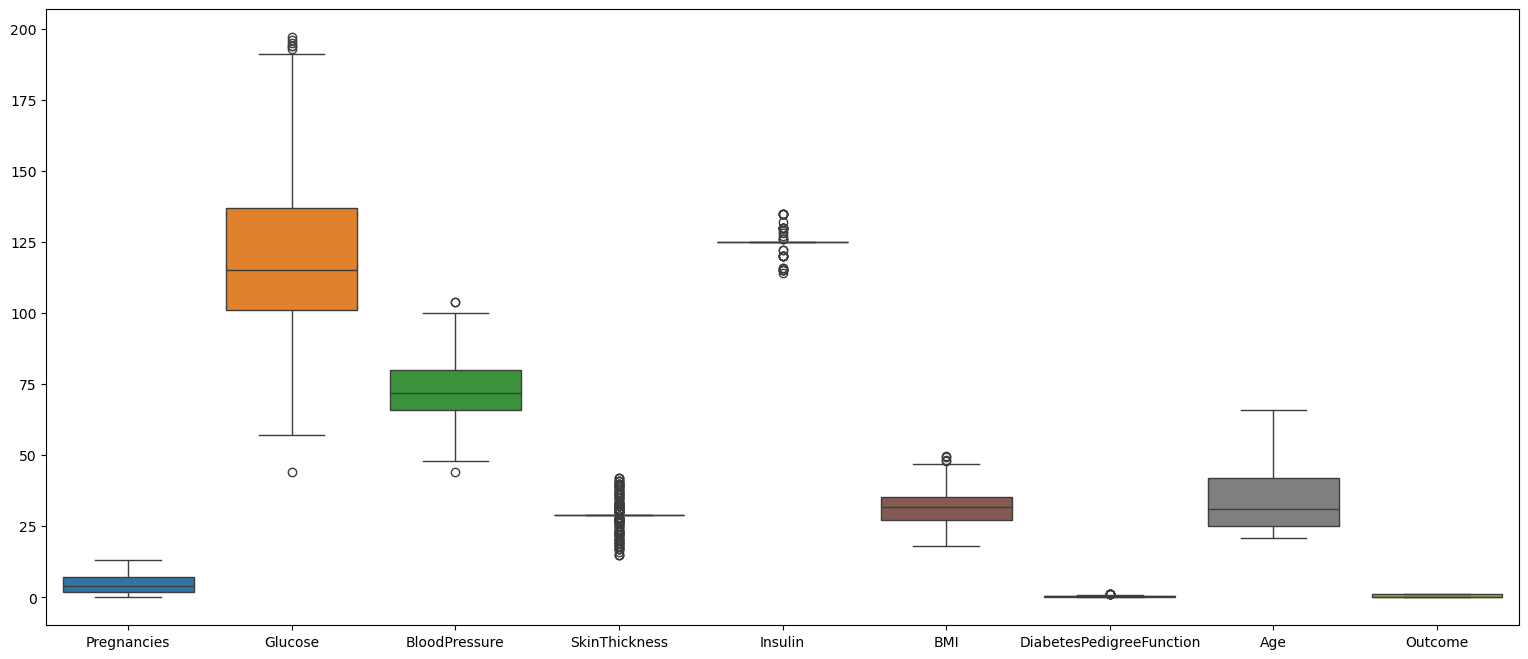

In [25]:
sns.boxplot(diabetes_df)

plt.show()

In [26]:
diabetes_df.shape

(375, 9)

### Divide the data frame into independent and dependent variables

In [27]:
X = diabetes_df.loc[:, :'Age'].values

y = diabetes_df.loc[:, 'Outcome'].values

### Data Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X = scaler.fit_transform(X)

### Split the Data into train and test data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
y_test.shape

(75,)

### Model Training

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#### Find the value of K and the accuracy

In [35]:
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f'K: {k}\tAccuracy:{accuracy:.2%}')

K: 1	Accuracy:66.67%
K: 2	Accuracy:64.00%
K: 3	Accuracy:70.67%
K: 4	Accuracy:73.33%
K: 5	Accuracy:77.33%
K: 6	Accuracy:76.00%
K: 7	Accuracy:74.67%
K: 8	Accuracy:70.67%
K: 9	Accuracy:74.67%
K: 10	Accuracy:74.67%
K: 11	Accuracy:74.67%
K: 12	Accuracy:76.00%
K: 13	Accuracy:73.33%
K: 14	Accuracy:74.67%
K: 15	Accuracy:76.00%
K: 16	Accuracy:73.33%
K: 17	Accuracy:73.33%
K: 18	Accuracy:70.67%
K: 19	Accuracy:77.33%


#### Create the KNN classifier with K value where the accuracy is high

In [36]:
model = KNeighborsClassifier(n_neighbors=5)

In [37]:
model.fit(X_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [38]:
model.score(X_train, y_train)

0.8033333333333333

### Model Testing

In [39]:
model.score(X_test, y_test)

0.7733333333333333

#### Confusion Matrix

In [40]:
y_predict = model.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_predict)

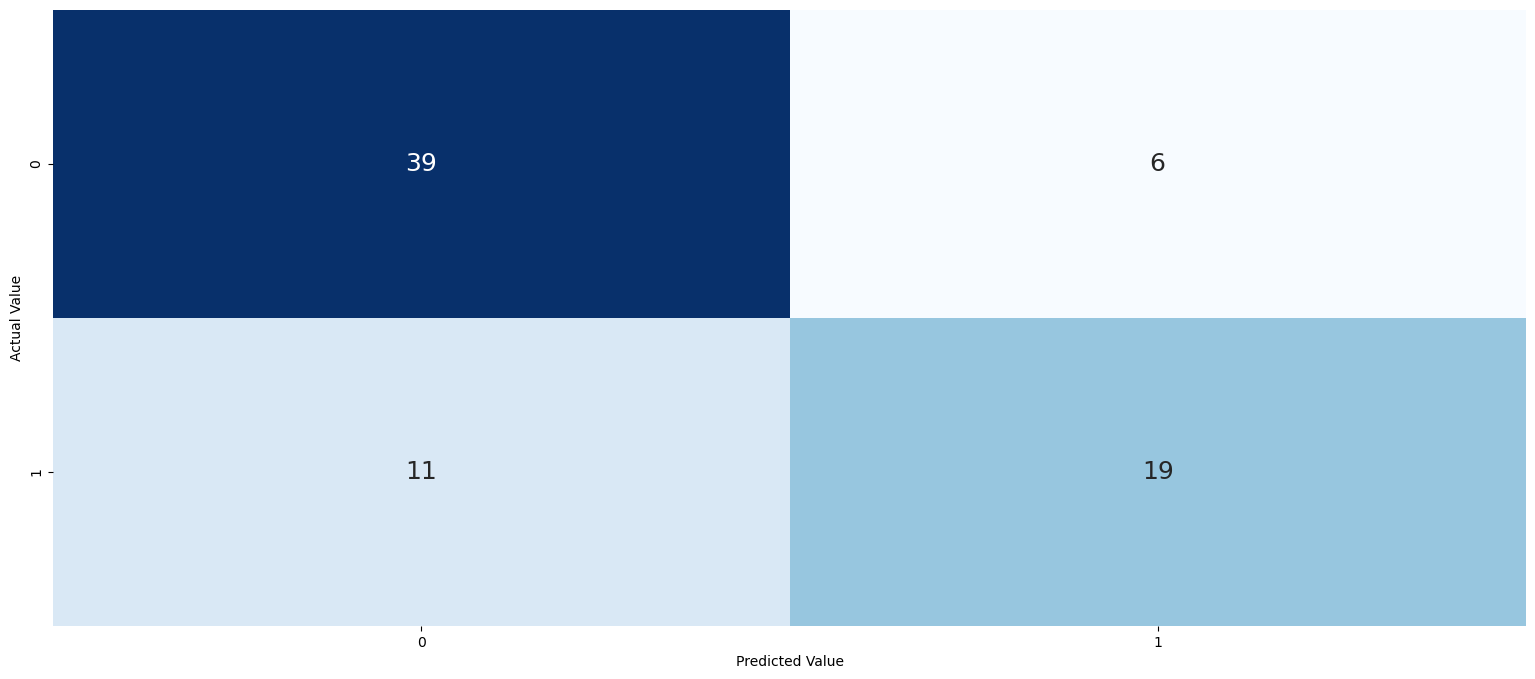

In [43]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={"fontsize":18})

plt.xlabel("Predicted Value")

plt.ylabel("Actual Value")

plt.show()

#### Classification Report

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        45
           1       0.76      0.63      0.69        30

    accuracy                           0.77        75
   macro avg       0.77      0.75      0.76        75
weighted avg       0.77      0.77      0.77        75

